In [157]:
# https://ithelp.ithome.com.tw/articles/10235449

import math
import statistics
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn import preprocessing,decomposition, metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [158]:
TEST_FILE = 'boston_housing/test.csv'
TRAIN_FILE = 'boston_housing/train.csv'

test_data = pd.read_csv(TEST_FILE)
train_data = pd.read_csv(TRAIN_FILE)
all_train_data = train_data.copy()

In [159]:
labels = train_data.pop('medv')

In [160]:
# 檢查缺失值
print(test_data.count())
print(test_data.count())


ID         173
crim       173
zn         173
indus      173
chas       173
nox        173
rm         173
age        173
dis        173
rad        173
tax        173
ptratio    173
black      173
lstat      173
dtype: int64
ID         173
crim       173
zn         173
indus      173
chas       173
nox        173
rm         173
age        173
dis        173
rad        173
tax        173
ptratio    173
black      173
lstat      173
dtype: int64


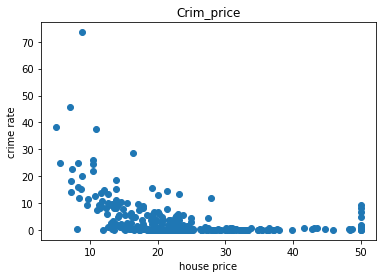

In [161]:
# 犯罪相關性
x = labels # 房價數據
y = train_data["crim"] # 犯罪率數據

plt.title("Crim_price")
plt.scatter(x, y)
plt.xlabel("house price") # x軸的標題
plt.ylabel("crime rate") # y軸的標題
 # 繪製散點圖
plt.show() # 顯示圖形

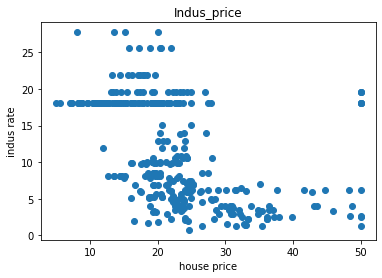

In [162]:
# 非商用土地比例相關性
x = labels # 房價數據
y = train_data["indus"]

plt.title("Indus_price")
plt.scatter(x, y)
plt.xlabel("house price") # x軸的標題
plt.ylabel("indus rate") # y軸的標題
 # 繪製散點圖
plt.show() # 顯示圖形

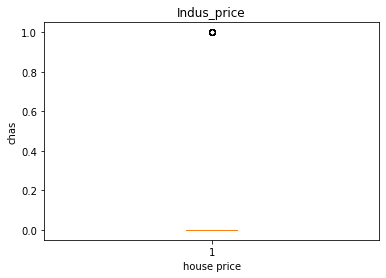

In [163]:
# 是否為河邊比例相關性
x = labels # 房價數據
y = train_data["chas"]

plt.title("Indus_price")
plt.boxplot(y)
plt.xlabel("house price") # x軸的標題
plt.ylabel("chas") # y軸的標題
 # 繪製散點圖
plt.show() # 顯示圖形

In [171]:
# from sklearn import preprocessing, linear_model
all_train_data.corr(method="pearson")
# 拿掉相關性小於 +- 0.4
mr_train_data = train_data.drop(columns=['ID','zn','chas','age','dis','rad','black'])
mr_test_data = test_data.drop(columns=['ID','zn','chas','age','dis','rad','black'])
print(mr_train_data.columns)
print(mr_test_data.columns)

Index(['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat'], dtype='object')
Index(['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat'], dtype='object')


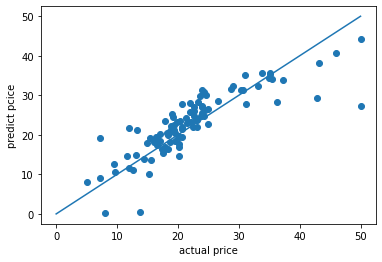

0.7415070971672502


In [165]:
# Degree1_LinearRegression
x = train_data
y = labels # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lnregr.predict(x_test) # test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果
print(lnregr.score(x_train, y_train))

In [166]:
def out_file(predictions, filename):
    """
    : param predictions: numpy.array, a list-like data structure that stores 0's and 1's
    : param filename: str, the filename you would like to write the results to
    """
    print('\n===============================================')
    print(f'Writing predictions to --> {filename}')
    with open(filename, 'w') as out:
        out.write('PassengerId,Survived\n')
        for ans in predictions:
            out.write(str(start_id) + ',' + str(ans) + '\n')
            start_id += 1
    print('===============================================')

In [168]:
#使用 選擇過的 mr_train_data
x = mr_train_data
y = labels # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()

for i in range(1,4):
    # Train_polynomial
    poly_fea_extractor = preprocessing.PolynomialFeatures(degree= i)
    x_train = poly_fea_extractor.fit_transform(x_train)

    #Test_data_predict
    x_test = poly_fea_extractor.transform(x_test)


    lnregr.fit(x_train, y_train) # 將資料拿去訓練
    y_predict = lnregr.predict(x_test) # test的資料用訓練出來的模型去預測

    mr_test_data = poly_fea_extractor.transform(mr_test_data)
    test_predict = lnregr.predict(mr_test_data)

    out_file(test_predict, "linearregression_degree"+str(i)+"_mr_data")
    print(f'Degree_{i} = {lnregr.score(x_train, y_train)}')
    print(f'Degree_{i}= {metrics.mean_squared_error(y_test, y_predict)}')

C:\Users\Theodos\Anaconda3\envs\Stancode\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 8 features, but PolynomialFeatures is expecting 7 features as input.

In [ ]:
# Degree2 較佳
poly_fea_extractor = preprocessing.PolynomialFeatures(degree= 2)
x_train = poly_fea_extractor.fit_transform(x_train)
x_test = poly_fea_extractor.transform(x_test)
lnregr.fit(x_train, y_train) # 將資料拿去訓練
y_predict = lnregr.predict(x_test) # test的資料用訓練出來的模型去預測
test_predict = lnregr.predict(test_data)
out_file(test_predict, "linearregression_degree2_mr_data")


In [ ]:
#使用 train_data
x = mr_train_data
y = labels # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()

for i in range(1,4):
    # Train_polynomial
    poly_fea_extractor = preprocessing.PolynomialFeatures(degree= i)
    x_train = poly_fea_extractor.fit_transform(x_train)

    #Test_data_predict
    x_test = poly_fea_extractor.transform(x_test)


    lnregr.fit(x_train, y_train) # 將資料拿去訓練
    y_predict = lnregr.predict(x_test) # test的資料用訓練出來的模型去預測

    print(f'Degree_{i} = {lnregr.score(x_train, y_train)}')
    print(f'Degree_{i}= {metrics.mean_squared_error(y_test, y_predict)}')